# Function approximation. Least squares

In this notebook i will approximate given function using least squares method. We will build 3 polynomials: zero degree, first degree and second degree. 

Given following:\
    function values $f(x_i)$ are known only for some points of the grid $\omega = \{a \le x_0 < x_1 < \dots <x_N \le b\} \subset [a,b]. $\
$\varphi_1(x), \dots, \varphi_n(x)$ - linearly independent functions on $[a,b]$
    \
Our task is: out of polynomials of the form 

\begin{equation}\tag{1}\label{goal}
    Q_n(x) = a_1\varphi_1 + \dots + a_n \varphi_n(x)
\end{equation}

choose function

\begin{equation}
    Q_n^{*}(x) = \sum_{i=1}^n a_i^{*}\varphi_i(x)
\end{equation}

that 

\begin{equation}\tag{2}
    \parallel Q_n^{*} - f \parallel  \; = \min_{a_1, \dots, a_n} \parallel Q_n^{*} - f \parallel
\end{equation}



## Algorithm:
Given **N** - number of points
1. Choose **n** $\ll$ **N** - approximation number (as mentioned before,  $n \in 0,1,2$ ) and linearly independent functions system

2. Build system of linear equations:
\begin{equation}\label{eq:sole}\tag{3}
    \sum_{j=1}^n (\varphi_i,\varphi_j)_{\omega}a_j = (f,\varphi_i)_{\omega},\: i\in(1, \dots,n)
    \end{equation} where 
\begin{equation}
    \sum_{j=1}^n (\varphi_i,\varphi_j)_{\omega} = \sum_{k=1}^N (\varphi_i(x_k),\varphi_j(x_k))\\
    \sum_{j=1}^n (\varphi_i,f)_{\omega} = \sum_{k=1}^N (\varphi_i(x_k),f(x_k)) \\
\end{equation} and solve it for $a_1, \dots, a_n$

3. With found $a_1^{*}, \dots, a_n^{n}$ build target polynomial $Q_n^{*}$ in form

\begin{equation}
    Q_n^{*}(x) = \sum_{i=1}^n a_i^{*}\varphi_i(x)
\end{equation}


## Realisation

Let's begin by importing needed libraries. I will write formulas using $\LaTeX$, so we will need `Latex` and `display` from `IPython.display`. We will need `numpy` for calculations, `matplotlib.pyplot` for visualization. I will also use `%matplotlib inline` magic command.

In [202]:
import numpy as np
from IPython.display import Latex
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

I will be approximating following function:
\begin{equation}
(x-2)^2 2^x-1
\end{equation}

For linearly independent basis i will choose following functions:
\begin{equation}
\varphi_0 = 1, \varphi_1 = x, \varphi_2 = x^2
\end{equation}

Let's code functions mentioned above. Each of them will take an array-like parameter and return numpy-array. I will also use scalar product function.

In [203]:
# function which we are approximating
def function(x):
    return np.asarray((x - 2)**2 * 2**x -1)

# basis functions
def phi(x, deg):
    return np.asarray(x ** deg)

def scalar_product(a,b):
    return np.sum(a*b)

We need function, which takes grid nodes `x` and polynomial degree `deg` as parameters, builds system (3), solves it and returns coefficients $a_i^{*}$ `coefficients`.This process will be divided by 3 parts. 

**Note**: polynomial $P$ with $degP = n$ needs system of $n+1$ equations.

In [204]:
# this function builds left part of equation (3)
def build_left(x, deg):
    return np.asarray([[scalar_product(phi(x,i),phi(x,j)) for j in range(deg+1)] for i in range(deg+1)])


# this function builds right part of equation (3)
def build_right(x,deg):
    return np.asarray([scalar_product(phi(x,i),function(x)) for i in range(deg+1)])


# this function solves equation (3) and returns polynomial coefficients
def find_coefficients(x,deg):
    a,b = build_left(x,deg), build_right(x,deg)
    coefficients = np.linalg.solve(a,b)
    return coefficients.ravel()

When we are able to find coefficients, it would be great to store them somewhere. Let's create small class `Polynomial`, so we can find values given certain x easily. For this i will create `calculate` mathod. I will override `__getitem__` - to easily get access to coefficients, and `__str__` - to print polynomial in more human-friendly format. Then this overrided method will be used to make `to_latex` function, which transforms our polynomial into beautiful math formula using $\LaTeX$ . 

In [205]:
class Polynomial:
    def __init__(self, coefficients):
        self.coefficients = coefficients
        self.deg = np.size(coefficients) - 1
        
        
    def __getitem__(self, key):
        return self.coefficients[key]

    
    def __str__(self):
        result =f"Q_{self.deg} = {str(self.coefficients[0])}"
        sign = {True: "+", False: ""}
        form = "".join(["{}{}x^{}".format(sign[self.coefficients[i] > 0],self.coefficients[i],i) for i in range(1,self.deg+1)])
        return result+form
    
    
    def to_latex(self):
        result =f"Q_{self.deg} = {str(self.coefficients[0])}"
        sign = {True: "+", False: ""}
        form = "".join(["{}{}x^{}".format(sign[self.coefficients[i] > 0],self.coefficients[i],i) for i in range(1,self.deg+1)])
        return Latex(f"""\\begin{{equation*}}
                {str(self)}
                \\end{{equation*}}""")
    
    
    def calculate(self,x):
        return np.asarray(sum([self.coefficients[i]* x**i for i in np.arange(self.deg+1)]))
    
    


### Gathering everything

Now we are ready to solve our task: find approximating polynomials for given function on given node grid. We need to see original function plot, as well as 3 other plots: for polynomials with degree 0,1 and 2. We will plot them on same figure.

Lets first plot our nodes grid and target function, and then create cycle to:
1. Build polynomial with degree *i*
2. Plot it
3. Print it's formula in $\LaTeX$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

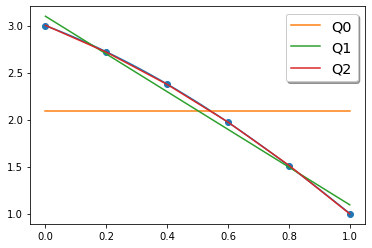

In [206]:
a,b = [0,1] # given section
N = 5 # nodes quantity

x_ = np.linspace(a,b,40, endpoint=True)
x = np.linspace(a,b,N+1) # nodes grid

fig,ax = plt.subplots()
ax.plot(x_,function(x_))
ax.scatter(x,function(x))

max_deg = 2
for deg in np.arange(max_deg+1):
    coefs = find_coefficients(x,deg)
    poly = Polynomial(coefs)
    ax.plot(x,poly.calculate(x),label="Q{}".format(deg))
    display(poly.to_latex())

legend = ax.legend(loc='best', shadow=True, fontsize='x-large')